In [2]:
import pandas as pd
import torch
import numpy as np

In [6]:
!unzip all.zip

Archive:  all.zip
  inflating: all.csv                 


In [12]:
unzipped_df = pd.read_csv('all.csv')

In [27]:
print(unzipped_df.columns)
unzipped_df.head()

Index(['Unnamed: 0', 'id_sol', 'title_sol', 'commentCount',
       'topLevelCommentCount', 'viewCount', 'solutionTags', 'post_id',
       'post_content'],
      dtype='object')


,Unnamed: 0,id_sol,title_sol,commentCount,topLevelCommentCount,viewCount,solutionTags,post_id,post_content
0,0,3619262.0,✅3 Method's || C++ || JAVA || PYTHON || Beginn...,22.0,12.0,64593.0,"['C++', 'Java', 'Python3', 'Array', 'Hash Table']",5545248.0,# Intuition\n<!-- Describe your first thoughts...
1,1,2990807.0,Solution - C++/Java/Python (Both Brute force...,111.0,67.0,314689.0,"['C++', 'Java', 'Python', 'Hash Table', 'Two P...",4733461.0,# Beginner doubt - Where is main function?\n- ...
2,2,3675059.0,(VIDEO) Step-by-Step Visualization Using a Has...,0.0,0.0,660.0,"['Python', 'Python3', 'Array', 'Hash Table']",5619788.0,https://www.youtube.com/watch?v=luicuNOBTAI\n\...
3,3,3662568.0,Python🔥Java🔥 C++🔥Simple Solution🔥Video Solution,0.0,0.0,6176.0,"['C++', 'Java', 'Python3', 'Hash Table']",5603349.0,# Please UPVOTE \uD83D\uDC4D\n# !! BIG ANNOUNC...
4,4,3543160.0,Python🔥Java🔥 C++🔥|| Simple Solution,15.0,12.0,81617.0,"['C++', 'Java', 'Python3', 'Array', 'Hash Table']",5445878.0,# Please UPVOTE \uD83D\uDC4D\n\n# **!! BIG ANN...


In [25]:
unzipped_df.iloc[:50]['title_sol'].values

array(["✅3 Method's || C++ || JAVA || PYTHON || Beginner Friendly🔥🔥🔥",
       'Solution  - C++/Java/Python  (Both Brute force & Optimized Code)',
       '(VIDEO) Step-by-Step Visualization Using a Hash Table',
       'Python🔥Java🔥 C++🔥Simple Solution🔥Video Solution',
       'Python🔥Java🔥 C++🔥|| Simple Solution',
       'Fastest and Easy to Understand Solution with Explanation',
       'C++ || O(N^2)', 'Java 100% runtime || Easy to Understand',
       'Hash Table Concept-->Python3',
       'Two sums || 3 easy methods in Python',
       'Approach using a hash table||C++||EASY',
       'Two Pointers Approach c++ || Simple and Easy c++',
       'short || simple || easy c++ || best approach',
       '✅Easy Solution Using Map 🔥 C++ ✅ Beginner Friendly🔥',
       '✅DETAILED EXPLANATION | Beginner Friendly🔥🔥🔥 | PYTHON |',
       '✅✔️O(N*log(N)) C++ Solution || Two pointer Approach || Easy to understand ✈️✈️✈️✈️✈️',
       'SCALA FUNCTIONAL CODE', 'Easy java solution',
       'Binary Search Solu

In [29]:
unzipped_df.iloc[:50]['solutionTags'].values

array(["['C++', 'Java', 'Python3', 'Array', 'Hash Table']",
       "['C++', 'Java', 'Python', 'Hash Table', 'Two Pointers']",
       "['Python', 'Python3', 'Array', 'Hash Table']",
       "['C++', 'Java', 'Python3', 'Hash Table']",
       "['C++', 'Java', 'Python3', 'Array', 'Hash Table']",
       "['Java', 'Python', 'C', 'JavaScript', 'Go']", "['C++', 'Array']",
       "['Java', 'Array']", "['Python3']", "['Python', 'Python3']",
       "['C++']", "['C++']", "['C', 'Array']", '[]',
       "['Python', 'Python3']",
       "['C++', 'Array', 'Two Pointers', 'Sorting']", "['Scala']",
       "['Java']", "['Swift']", "['C++']", "['Python', 'Python3']",
       "['C#', 'JavaScript']",
       "['C++', 'Java', 'Python3', 'C#', 'JavaScript']",
       "['Java', 'Array', 'Hash Table']",
       "['C++', 'Java', 'Python3', 'C#', 'JavaScript']", "['C++']",
       "['Swift', 'Array', 'Hash Table', 'Two Pointers', 'Binary Search']",
       "['C++']", "['Java', 'C', 'Array', 'Hash Table']",
       "['Java

In [34]:
for i in tqdm_basic(range(10)):
    print(i)
    print(unzipped_df.iloc[i,-1].replace('\\n','\n'))
    print(f"{'|'*100}\n"*)

100%|██████████| 10/10 [00:00<00:00, 5895.84it/s]

0
# Intuition
<!-- Describe your first thoughts on how to solve this problem. -->
The Two Sum problem asks us to find two numbers in an array that sum up to a given target value. We need to return the indices of these two numbers.
# Approach
<!-- Describe your approach to solving the problem. -->
1. One brute force approach is to consider every pair of elements and check if their sum equals the target. This can be done using nested loops, where the outer loop iterates from the first element to the second-to-last element, and the inner loop iterates from the next element to the last element. However, this approach has a time complexity of O(n^2).
2. A more efficient approach is to use a hash table (unordered_map in C++). We can iterate through the array once, and for each element, check if the target minus the current element exists in the hash table. If it does, we have found a valid pair of numbers. If not, we add the current element to the hash table.

**Approach using a hash table:*

In [35]:
unzipped_df.shape

(3128112, 9)

In [57]:
unzipped_df.isna().sum()

Unnamed: 0               0
id_sol                   0
title_sol                1
commentCount             0
topLevelCommentCount     0
viewCount                0
solutionTags             0
post_id                  0
post_content            10
title__simple            0
dtype: int64

In [58]:
unzipped_df = unzipped_df[
    ~unzipped_df['title_sol'].isna() &\
    ~unzipped_df['post_content'].isna()
]

In [64]:
keywords_for_simple_cases__titles = [
    'beginner', 'friendly', 'easy', 'simple', 'basic', 'short', 'fast'
]
keywords_for_simple_cases__content = [
    'beginner', 'friendly'
]

In [90]:
def t(title):
    try:
        return any((kw in title.lower()) for kw in keywords_for_simple_cases__titles)
    except:
        print(title)
        raise

In [91]:
unzipped_df['title__simple'] = unzipped_df['title_sol'].apply(t)
print('% of titles with "simple" keywords', unzipped_df['title__simple'].mean())

% of titles with "simple" keywords 0.43974986741157013


/tmp/ipykernel_1200372/1493884131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unzipped_df['title__simple'] = unzipped_df['title_sol'].apply(t)


In [92]:
unzipped_df['content__simple'] = unzipped_df['post_content'].apply(
    lambda content: any((kw in content.lower()) for kw in keywords_for_simple_cases__content)
)
print('% of post content with "simple" keywords', unzipped_df['content__simple'].mean())

% of post content with "simple" keywords 0.0011230455794106393


/tmp/ipykernel_1200372/3324867704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unzipped_df['content__simple'] = unzipped_df['post_content'].apply(


In [93]:
(unzipped_df['content__simple'] | unzipped_df['title__simple']).sum()

1377059

In [80]:
import ast
ast.literal_eval(unzipped_df['solutionTags'].iloc[0])

['C++', 'Java', 'Python3', 'Array', 'Hash Table']

In [87]:
unzipped_df['tags_list'] = unzipped_df['solutionTags'].apply(ast.literal_eval)

/tmp/ipykernel_1200372/1914350737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unzipped_df['tags_list'] = unzipped_df['solutionTags'].apply(ast.literal_eval)


In [89]:
from itertools import chain
np.unique(list(chain(*unzipped_df['tags_list'].values)))

array(['Array', 'Backtracking', 'Bash', 'Biconnected Component',
       'Binary Indexed Tree', 'Binary Search', 'Binary Search Tree',
       'Binary Tree', 'Bit Manipulation', 'Bitmask', 'Brainteaser',
       'Breadth-First Search', 'Bucket Sort', 'C', 'C#', 'C++',
       'Combinatorics', 'Concurrency', 'Counting', 'Counting Sort',
       'Dart', 'Data Stream', 'Database', 'Depth-First Search', 'Design',
       'Divide and Conquer', 'Doubly-Linked List', 'Dynamic Programming',
       'Elixir', 'Enumeration', 'Erlang', 'Eulerian Circuit',
       'Game Theory', 'Geometry', 'Go', 'Graph', 'Greedy', 'HTML',
       'Hash Function', 'Hash Table', 'Heap (Priority Queue)',
       'Interactive', 'Iterator', 'Java', 'JavaScript', 'Kotlin',
       'Line Sweep', 'Linked List', 'MS SQL Server', 'Math', 'Matrix',
       'Memoization', 'Merge Sort', 'Minimum Spanning Tree',
       'Monotonic Queue', 'Monotonic Stack', 'MySQL', 'Number Theory',
       'Oracle', 'Ordered Map', 'Ordered Set', 'PHP', 'Pr

In [95]:
python_kw = ['Python', 'Python ML', 'Python3']

In [96]:
unzipped_df['python'] = unzipped_df['tags_list'].apply(
    lambda tags: any(kw in tags for kw in python_kw)
)

/tmp/ipykernel_1200372/3925921172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unzipped_df['python'] = unzipped_df['tags_list'].apply(


In [97]:
print('% of python tasks', unzipped_df['python'].mean())

% of python tasks 0.11146954653957784


In [98]:
unzipped_df['python'].sum()

348688

In [99]:
(unzipped_df['python'] &\
 (unzipped_df['content__simple'] | unzipped_df['title__simple'])
).sum()

149239

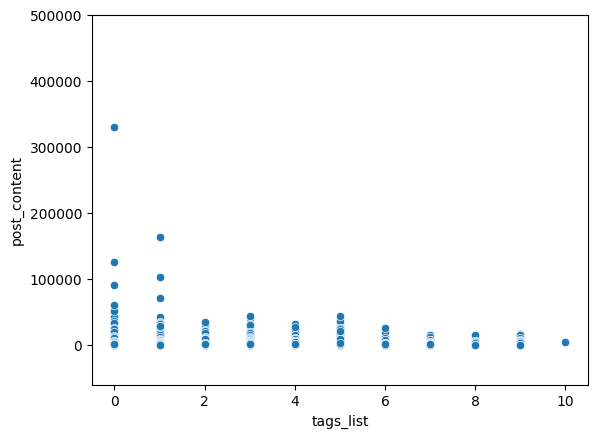

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(
    x=unzipped_df['tags_list'].apply(len),
    y=unzipped_df['post_content'].apply(len),
)
plt.ylim(None,0.5e6)
plt.show()

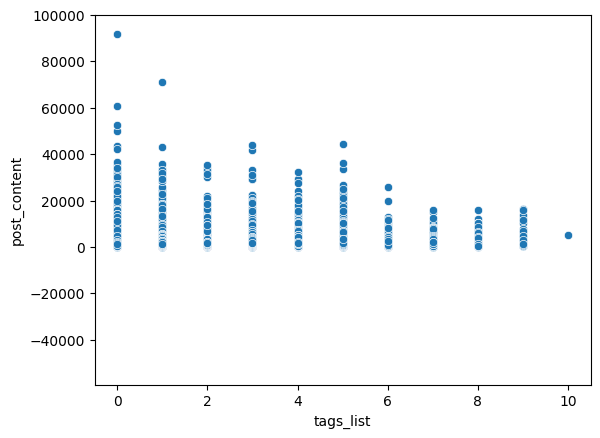

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(
    x=unzipped_df['tags_list'].apply(len),
    y=unzipped_df['post_content'].apply(len),
)
plt.ylim(None,0.1e6)
plt.show()

In [177]:
import re
re.findall('(?<=#)(.*?)(?:\n|\Z)(.*?)(?:\n)', 
           unzipped_df.iloc[9]['post_content'].replace('\\n','\n')
          )

[]

In [209]:
import re
re.findall('(?<=# Intuition)(.*?)(?=#)', 
           unzipped_df.iloc[9]['post_content'] #.replace('\\n','\n')
          )
# re.search('# Intuitio(.*?)Method', 
#            unzipped_df.iloc[9]['post_content'] #.replace('\\n','\n')
#           ).group(0)

['\\nMethod 1: A brute-force solution to find two numbers in the nums list that add up to the target value.\\n\\nMethod 2: By list concept\\n\\nMethod 3: By Dictionary (more efficient solution)\\n']

In [135]:
import re
re.findall('(?<=#)(.*?)(?:\n|\Z)(.*?)(?:\n)', 
           unzipped_df.iloc[9]['post_content'].replace('\\n','\n')
          )

[(' Intuition',
  'Method 1: A brute-force solution to find two numbers in the nums list that add up to the target value.'),
 (' Approach', 'Method 1: '),
 (' Complexity', '- Time complexity:'),
 (' Code', '')]

In [136]:
import re
def find_hashed_parts__names(post_content):
    return re.findall('(?<=#)(.*?)(?:\n|\Z)', 
           post_content.replace('\\n','\n')
          )
find_hashed_parts__names(unzipped_df.iloc[9]['post_content'])

[' Intuition', ' Approach', ' Complexity', ' Code']

In [ ]:
unzipped_df['hashed__names'] = unzipped_df['post_content'].apply(
    find_hashed_parts__names
)

In [140]:
unzipped_df['hashed__names'].values

array([list([' Intuition', ' Approach', ' Code', ' Solution 1: (Brute Force)', ' No solution found', ' Solution 2: (Two-pass Hash Table)', ' Build the hash table', ' Find the complement', ' No solution found', ' Solution 3: (One-pass Hash Table)', ' No solution found']),
       list([' Beginner doubt - Where is main function?', ' Problem Constraints', ' Brute Force Approach', ' Brute Force Code', ' Complexity', ' Optimized Code', 'include <unordered_map>', ' Complexity', ' DRY Run', ' Upvote Me If You Like It ']),
       list([' Code']), ..., list([" \\'R\\' > \\'L\\'"]),
       list([' Intuition & Approach', ' Complexity', ' Code']), list([])],
      dtype=object)

In [142]:
from collections import Counter
counter = Counter(chain(*unzipped_df['hashed__names'].values))

In [143]:
counter

Counter({' Intuition': 420358,
         ' Approach': 443171,
         ' Code': 682777,
         ' Solution 1: (Brute Force)': 1,
         ' No solution found': 12,
         ' Solution 2: (Two-pass Hash Table)': 1,
         ' Build the hash table': 1,
         ' Find the complement': 1,
         ' Solution 3: (One-pass Hash Table)': 1,
         ' Beginner doubt - Where is main function?': 1,
         ' Problem Constraints': 1,
         ' Brute Force Approach': 62,
         ' Brute Force Code': 15,
         ' Complexity': 498839,
         ' Optimized Code': 34,
         'include <unordered_map>': 490,
         ' DRY Run': 1,
         ' Upvote Me If You Like It ': 1,
         ' Please UPVOTE \\uD83D\\uDC4D': 63,
         ' !! BIG ANNOUNCEMENT !!': 4,
         ' Video Solution': 56,
         ' Recursion Explained (How to think recursively)': 4,
         ' An Upvote will be encouraging': 15,
         ' **!! BIG ANNOUNCEMENT !!**': 1,
         'please upvote me it would encourage me alot': 7

In [147]:
counter.most_common(10)

[(' Code', 682777),
 (' Complexity', 498839),
 (' Approach', 443171),
 (' Intuition', 420358),
 ('         self.val = val', 27825),
 (' Definition for a binary tree node.', 21623),
 (' class TreeNode:', 17838),
 ('         self.right = right', 16864),
 ('         self.left = left', 16862),
 ('     def __init__(self, val=0, left=None, right=None):', 16854)]

In [144]:
unzipped_df['python+simple'] = unzipped_df['python'] &\
 (unzipped_df['content__simple'] | unzipped_df['title__simple'])

/tmp/ipykernel_1200372/4062430244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unzipped_df['python+simple'] = unzipped_df['python'] &\


In [145]:
counter__python_simple = Counter(chain(*unzipped_df['hashed__names'][unzipped_df['python+simple']].values))
counter__python_simple

Counter({' Intuition': 31126,
         ' Approach': 33160,
         ' Code': 53647,
         ' Solution 1: (Brute Force)': 1,
         ' No solution found': 7,
         ' Solution 2: (Two-pass Hash Table)': 1,
         ' Build the hash table': 1,
         ' Find the complement': 1,
         ' Solution 3: (One-pass Hash Table)': 1,
         ' Beginner doubt - Where is main function?': 1,
         ' Problem Constraints': 1,
         ' Brute Force Approach': 8,
         ' Brute Force Code': 1,
         ' Complexity': 36221,
         ' Optimized Code': 3,
         'include <unordered_map>': 4,
         ' DRY Run': 1,
         ' Upvote Me If You Like It ': 1,
         ' Please UPVOTE \\uD83D\\uDC4D': 47,
         ' !! BIG ANNOUNCEMENT !!': 4,
         ' Video Solution': 23,
         ' Recursion Explained (How to think recursively)': 4,
         ' An Upvote will be encouraging': 10,
         ' **!! BIG ANNOUNCEMENT !!**': 1,
         ' []': 20,
         '### Example : JavaScript Code (using 

In [146]:
counter__python_simple.most_common(10)

[(' Code', 53647),
 (' Complexity', 36221),
 (' Approach', 33160),
 (' Intuition', 31126),
 ('         self.val = val', 8226),
 (' Definition for a binary tree node.', 5332),
 ('         self.right = right', 4892),
 ('     def __init__(self, val=0, left=None, right=None):', 4890),
 ('         self.left = left', 4890),
 (' class TreeNode:', 4804)]

In [158]:
import re
re.findall('(?<=# Intuition\n)(.*?)(?:#)', 
           unzipped_df.iloc[0]['post_content'].replace('\\n','\n')
          )

[]

In [163]:
import re
re.findall('(?<=#)(.*?)(?:\n|\Z)(.*?)(?:\#)', 
           unzipped_df.iloc[9]['post_content'].replace('\\n','\n')
          )

[]

In [246]:
headers = [' Code',' Complexity',' Approach',' Intuition']

In [248]:
unzipped_df['hashed__names']
unzipped_df['hashed__headers'] = unzipped_df['hashed__names'].apply(
    lambda names: np.array(names)[np.isin(names, headers)]
)

/tmp/ipykernel_1200372/1267113559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unzipped_df['hashed__headers'] = unzipped_df['hashed__names'].apply(


In [519]:
def get_order_dict(headers):
    if len(headers) == 0:
        return None
    order_dict = {}
    if len(headers) > 1:
        order_dict = {l.strip(): f'# {r.strip()}' for l, r in zip(headers[:-1], headers[1:])}
    order_dict[headers[-1].strip()] = '\Z'
    return order_dict

In [520]:
unzipped_df['headers_order'] = unzipped_df['hashed__headers'].apply(get_order_dict)

/tmp/ipykernel_1200372/1318726614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unzipped_df['headers_order'] = unzipped_df['hashed__headers'].apply(get_order_dict)


In [521]:
unzipped_df['headers_order']

0          {'Intuition': '# Approach', 'Approach': '# Cod...
1                                       {'Complexity': '\Z'}
2                                             {'Code': '\Z'}
3                                                       None
4                                                       None
                                 ...                        
3128107                                       {'Code': '\Z'}
3128108                                                 None
3128109                                                 None
3128110               {'Complexity': '# Code', 'Code': '\Z'}
3128111                                                 None
Name: headers_order, Length: 3128101, dtype: object

In [372]:
# def extract_part(header):
#     def f(post_content):
#         inside_part = re.findall(
#             f'(?<=# {header})(.*?)(?=#)', 
#             post_content
#         )
#         if inside_part:
#             return inside_part
    
#         last_part = re.findall(
#             f'(?<=# {header})(.*?)(?=\Z)', 
#             post_content
#         )
#         if last_part:
#             return last_part
    
#         else:
#             return None
            
#     return f

def extract_parts(row):
        if row['headers_order'] is None:
            return {}
        
        parts = {}
        for l, r in row['headers_order'].items():
            # print(l,r)
            parts[l] = re.findall(
                f'(?<=# {l})(.*?)(?={r})', 
                row['cleaned_post_content']
            )
        return parts

In [296]:
unzipped_df.iloc[0]['headers_order']

{'Intuition': '=Approach', 'Approach': '=Code', ' Code': ':\\Z'}

In [522]:
extract_parts(unzipped_df.iloc[0])

{'Intuition': ['\\n<!-- Describe your first thoughts on how to solve this problem. -->\\nThe Two Sum problem asks us to find two numbers in an array that sum up to a given target value. We need to return the indices of these two numbers.\\n'],
 'Approach': ['\\n<!-- Describe your approach to solving the problem. -->\\n1. One brute force approach is to consider every pair of elements and check if their sum equals the target. This can be done using nested loops, where the outer loop iterates from the first element to the second-to-last element, and the inner loop iterates from the next element to the last element. However, this approach has a time complexity of O(n^2).\\n2. A more efficient approach is to use a hash table (unordered_map in C++). We can iterate through the array once, and for each element, check if the target minus the current element exists in the hash table. If it does, we have found a valid pair of numbers. If not, we add the current element to the hash table.\\n\\n**A

In [316]:
unzipped_df['hashed__headers']

0          [ Intuition,  Approach,  Code]
1              [ Complexity,  Complexity]
2                                 [ Code]
3                                      []
4                                      []
                        ...              
3128107                           [ Code]
3128108                                []
3128109                                []
3128110              [ Complexity,  Code]
3128111                                []
Name: hashed__headers, Length: 3128101, dtype: object

In [340]:
re.sub('\!\[.*\]\(.*\)', '',
# re.sub('', '',
    unzipped_df.iloc[3]['post_content']
)

"# Please UPVOTE \\uD83D\\uDC4D\\n# !! BIG ANNOUNCEMENT !!\\nI am currently Giving away my premium content well-structured assignments and study materials to clear interviews at top companies related to computer science and data science to my current Subscribers this week. This is Only for first 10,000 subscribers. **DON\\'T FORGET** to Subscribe\\n\\n**Click this link to Subscribe \\uD83D\\uDC49https://www.youtube.com/@techwired8/?sub_confirmation=1**\\n\\nLet\\'s connect!\\n\\nDiscord \\uD83D\\uDC49 https://discord.gg/gJDCyeGh6X\\nTwitter \\uD83D\\uDC49 https://twitter.com/TechWired8\\n\\nHappy Learning, Cheers Guys \\uD83D\\uDE0A\\n\\n# Video Solution\\nhttps://youtu.be/oadssnyJA90\\n\\n\\n# Recursion Explained (How to think recursively)\\nhttps://youtu.be/KjpmuPDQWcU\\n\\n\\n```Python []\\nclass Solution:\\n    def twoSum(self, nums: List[int], target: int) -> List[int]:\\n        \\n        d = {}\\n        for i, j in enumerate(nums):\\n            r = target - j\\n            if

In [339]:
# re.sub('\!\[.*\]\(.*\)', '',
re.sub('', '',
    unzipped_df.iloc[3]['post_content']
)

"# Please UPVOTE \\uD83D\\uDC4D\\n# !! BIG ANNOUNCEMENT !!\\nI am currently Giving away my premium content well-structured assignments and study materials to clear interviews at top companies related to computer science and data science to my current Subscribers this week. This is Only for first 10,000 subscribers. **DON\\'T FORGET** to Subscribe\\n\\n**Click this link to Subscribe \\uD83D\\uDC49https://www.youtube.com/@techwired8/?sub_confirmation=1**\\n\\nLet\\'s connect!\\n\\nDiscord \\uD83D\\uDC49 https://discord.gg/gJDCyeGh6X\\nTwitter \\uD83D\\uDC49 https://twitter.com/TechWired8\\n\\nHappy Learning, Cheers Guys \\uD83D\\uDE0A\\n\\n# Video Solution\\nhttps://youtu.be/oadssnyJA90\\n\\n\\n# Recursion Explained (How to think recursively)\\nhttps://youtu.be/KjpmuPDQWcU\\n\\n\\n```Python []\\nclass Solution:\\n    def twoSum(self, nums: List[int], target: int) -> List[int]:\\n        \\n        d = {}\\n        for i, j in enumerate(nums):\\n            r = target - j\\n            if

In [366]:
def clean_content(post_content):
    return re.sub('\!\[.*\]\(.*\)', '',
        post_content
    )

In [367]:
unzipped_df['cleaned_post_content'] = unzipped_df['post_content'].apply(clean_content)

/tmp/ipykernel_1200372/2684000287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unzipped_df['cleaned_post_content'] = unzipped_df['post_content'].apply(clean_content)


In [368]:
unzipped_df['cleaned_post_content']

0          # Intuition\n<!-- Describe your first thoughts...
1          # Beginner doubt - Where is main function?\n- ...
2          https://www.youtube.com/watch?v=luicuNOBTAI\n\...
3          # Please UPVOTE \uD83D\uDC4D\n# !! BIG ANNOUNC...
4          # Please UPVOTE \uD83D\uDC4D\n\n# **!! BIG ANN...
                                 ...                        
3128107    \n# Code\n```\nclass Solution {\npublic:\n    ...
3128108    ```\nclass Solution {\npublic:\n    vector<int...
3128109    Consider we have a directions "RRRLRRLLRR".\nW...
3128110    # Intuition & Approach\n- Use a stack to keep ...
3128111    ```\nclass Solution:\n    def survivedRobotsHe...
Name: cleaned_post_content, Length: 3128101, dtype: object

In [291]:
# extract_parts(unzipped_df.iloc[2]['post_content'])
re.findall(
                f'(?<=# Code)(.*?)(?=\Z)', 
                unzipped_df.iloc[2]['post_content']
            )

['\\n```\\nclass Solution(object):\\n    def twoSum(self, nums, target):\\n        seen = {}\\n        for i in range(len(nums)):\\n            diff = target - nums[i]\\n            if diff in seen:\\n                return [seen[diff], i]\\n            else:\\n                seen[nums[i]] = i\\n```']

In [287]:
extract_parts(unzipped_df.iloc[0])

Intuition =Approach
Approach =Code
 Code :\Z


{'Intuition': ['\\n<!-- Describe your first thoughts on how to solve this problem. -->\\nThe Two Sum problem asks us to find two numbers in an array that sum up to a given target value. We need to return the indices of these two numbers.\\n# '],
 'Approach': ['\\n<!-- Describe your approach to solving the problem. -->\\n1. One brute force approach is to consider every pair of elements and check if their sum equals the target. This can be done using nested loops, where the outer loop iterates from the first element to the second-to-last element, and the inner loop iterates from the next element to the last element. However, this approach has a time complexity of O(n^2).\\n2. A more efficient approach is to use a hash table (unordered_map in C++). We can iterate through the array once, and for each element, check if the target minus the current element exists in the hash table. If it does, we have found a valid pair of numbers. If not, we add the current element to the hash table.\\n\\n*

In [523]:
unzipped_df['parts'] = unzipped_df.apply(extract_parts, axis=1)

/tmp/ipykernel_1200372/2212138029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unzipped_df['parts'] = unzipped_df.apply(extract_parts, axis=1)


In [374]:
unzipped_df['parts'] = unzipped_df['parts'].apply(
        lambda parts: parts if parts else {}
    )

/tmp/ipykernel_1200372/1331078358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unzipped_df['parts'] = unzipped_df['parts'].apply(


In [524]:
for header in ['Code','Complexity','Approach','Intuition']:
    unzipped_df[header] = unzipped_df['parts'].apply(
        lambda parts: parts.get(header, None)
    )
    print(header, (~unzipped_df[header].isna()).mean())

/tmp/ipykernel_1200372/181592665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unzipped_df[header] = unzipped_df['parts'].apply(


Code 0.2171617860165001


/tmp/ipykernel_1200372/181592665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unzipped_df[header] = unzipped_df['parts'].apply(


Complexity 0.15848177536467012


/tmp/ipykernel_1200372/181592665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unzipped_df[header] = unzipped_df['parts'].apply(


Approach 0.14147497155622532
Intuition 0.13428370759128302


/tmp/ipykernel_1200372/181592665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unzipped_df[header] = unzipped_df['parts'].apply(


In [525]:
for header in ['Code','Complexity','Approach','Intuition']:
    unzipped_df[f'{header}_count'] = unzipped_df[header].apply(lambda arr: len(arr) if arr else None)

/tmp/ipykernel_1200372/3997439806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unzipped_df[f'{header}_count'] = unzipped_df[header].apply(lambda arr: len(arr) if arr else None)
/tmp/ipykernel_1200372/3997439806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unzipped_df[f'{header}_count'] = unzipped_df[header].apply(lambda arr: len(arr) if arr else None)
/tmp/ipykernel_1200372/3997439806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [526]:
for header in ['Code','Complexity','Approach','Intuition']:
    print(unzipped_df[f'{header}_count'].value_counts())

Code_count
1.0    669847
2.0        36
3.0        12
5.0         1
Name: count, dtype: int64
Complexity_count
1.0    487649
2.0      1294
3.0       247
4.0        90
5.0        12
6.0         1
Name: count, dtype: int64
Approach_count
1.0    437628
2.0       380
3.0        62
4.0        25
5.0         2
6.0         1
Name: count, dtype: int64
Intuition_count
1.0    417250
2.0       206
3.0        24
4.0        11
Name: count, dtype: int64


In [527]:
unzipped_df['properly_scructured'] = ((unzipped_df['Code_count']==1) & (unzipped_df['Approach_count']==1) \
    & (unzipped_df['Intuition_count']==1) & (unzipped_df['Complexity_count']==1))
# single_samples = unzipped_df[

/tmp/ipykernel_1200372/1678665533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unzipped_df['properly_scructured'] = ((unzipped_df['Code_count']==1) & (unzipped_df['Approach_count']==1) \


In [399]:
unzipped_df['properly_scructured'].sum()

379926

In [528]:
structured_python_samples = unzipped_df[
    unzipped_df['properly_scructured'] & unzipped_df['python+simple']
].copy()
structured_python_samples.shape

(27263, 32)

In [529]:
for header in ['Code','Complexity','Approach','Intuition']:
    structured_python_samples[header] = structured_python_samples[header].apply(lambda arr: arr[0])

In [406]:
structured_python_samples[header]

9          \nMethod 1: A brute-force solution to find two...
14         \n<!-- Describe your first thoughts on how to ...
121        \nThe problem can be solved in `O(n^2)`, `n(lo...
141              \nsolving using simple beginner method.\n# 
185                    \nUse Dictionary (i.e Hashmap) \n\n# 
                                 ...                        
3127812    \n<!-- Describe your first thoughts on how to ...
3127857    \n<!-- Describe your first thoughts on how to ...
3127889    \n<!-- Describe your first thoughts on how to ...
3127891    \n<!-- Describe your first thoughts on how to ...
3128066    \n<!-- Describe your first thoughts on how to ...
Name: Intuition, Length: 27263, dtype: object

In [530]:
structured_python_samples.drop(
    columns=['Unnamed: 0',
       'solutionTags', 'cleaned_post_content', 'post_content',
       'title__simple', 'content__simple', 'solutionTags',
       'python', 'hashed__names', 'python+simple', 'code', 'complexity',
       'approach', 'intuition', 'hashed__headers', 'headers_order', 'parts',
        'Code_count', 'Complexity_count', 'Approach_count', 'Intuition_count',
       'properly_scructured'],
    inplace=True
)

In [417]:
structured_python_samples.iloc[0]

id_sol                                                          3556832.0
title_sol                            Two sums || 3 easy methods in Python
commentCount                                                          6.0
topLevelCommentCount                                                  4.0
viewCount                                                         31744.0
post_id                                                         5463583.0
tags_list                                               [Python, Python3]
Code                    \n\nMethod 1: \n```\nclass Solution:\n    def ...
Complexity              \n- Time complexity:\n\nMethod 1: \nO(n^2) due...
Approach                \nMethod 1: \nThe code uses nested loops to it...
Intuition               \nMethod 1: A brute-force solution to find two...
Name: 9, dtype: object

In [490]:
def clean_code(code):
    return re.sub('\*.*?\*', '',
        code
    )

def remove_url(content):
    try:
        return re.sub(
            '(https:\/\/www\.|http:\/\/www\.|https:\/\/|http:\/\/)?[a-zA-Z]{2,}(\.[a-zA-Z]{2,})(\.[a-zA-Z]{2,})?\/[a-zA-Z0-9]{2,}|((https:\/\/www\.|http:\/\/www\.|https:\/\/|http:\/\/)?[a-zA-Z]{2,}(\.[a-zA-Z]{2,})(\.[a-zA-Z]{2,})?)|(https:\/\/www\.|http:\/\/www\.|https:\/\/|http:\/\/)?[a-zA-Z0-9]{2,}\.[a-zA-Z0-9]{2,}\.[a-zA-Z0-9]{2,}(\.[a-zA-Z0-9]{2,})?',
            '', content)
    except:
        print(content)

In [531]:
for header in tqdm.tqdm(['Code','Complexity','Approach','Intuition']):
    structured_python_samples[header] = structured_python_samples[header].apply(remove_url)

100%|██████████| 4/4 [00:07<00:00,  1.80s/it]


In [532]:
structured_python_samples['Code'] = structured_python_samples['Code'].apply(clean_code)

In [542]:
for header in ['Code','Complexity','Approach','Intuition']:
    structured_python_samples[header] = structured_python_samples[header].apply(
        lambda item: item.replace('\\n','\n').strip()
    )

In [534]:
for header in ['Code','Complexity','Approach','Intuition']:
    print(header)
    print(f"{'*'*100}\n")
    for item in structured_python_samples[header].sample(5).values:
        print(item.replace('\\n','\n'))
        print(f"{'|'*100}\n")
    print(f"{'|'*100}\n"*5)

Code
****************************************************************************************************


```
class Solution:
    def distanceBetweenBusStops(self, distance: List[int], start: int, destination: int) -> int:
        return min(sum(distance[start:destination]),sum(distance[destination:len(distance)])+sum(distance[0:start])) if destination>=start else min(sum(distance[destination:start]),sum(distance[start:len(distance)])+sum(distance[0:destination]))
```
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


```
class Solution:
    def findSmallestInteger(self, nums: List[int], value: int) -> int:
        nums = [n % value for n in nums]
        count = Counter(nums)
        for i in range(value):
            if i not in count:
                return i

        n = min(())
        res = n * value
        curr = 0
        for i in range(value):
            if count[i] == n:
                return res
            res += 1




In [546]:
(structured_python_samples['Intuition'] == '<!-- Describe your first thoughts on how to solve this problem. -->').mean()

0.6290576972453509

In [563]:
mock = structured_python_samples['Complexity'].value_counts().index[0]
structured_python_samples['Complexity_flag'] = structured_python_samples['Complexity'].apply(
    lambda item: item==mock
)

In [567]:
mock = structured_python_samples['Approach'].value_counts().index[0]
structured_python_samples['Approach_flag'] = structured_python_samples['Approach'].apply(
    lambda item: item==mock
)

16923

In [578]:
mocks = []
for i, value in enumerate(structured_python_samples['Intuition'].value_counts()[:30].index):
    print(value)
    if not input():
        mocks.append(i)

<!-- Describe your first thoughts on how to solve this problem. -->


Aditya college of engineering and technology , surampalem , kakinada , andhra pradesh , india


Python easy solution


<!-- Describe your first thoughts on how to solve this problem. -->
simple and easy


Recursion


 1


DFS


 1


BFS


 1


Easy Solution | Python


<!-- Describe your first thoughts on how to solve this problem. -->
Sliding Window


 1


please upvote if its useful


<!--  -->


<!-- Describe your first thoughts on how to solve this problem. -->
BFS


 1


Describe your first thoughts on how to solve this problem. -->


Binary Search


 1


Code VIT


 1


<!-- Describe your first thoughts on how to solve this problem. -->
Simple


Sorting


 1


PLEASE UPVOTE IF ITS USEFUL


<!-- Describe your first thoughts on how to solve this problem. -->
Find the minimum number of coins that make up the amount.


 1


<!-- Describe your first thoughts on how to solve this problem. -->
Sorting


 1


This solution follows a [framework](/SolvingDPProblems/) for solving DP problems.


 1


<!-- Describe your first thoughts on how to solve this problem. -->
Recursion


 1


We have compare the prices of a day with prices of next day, if the next day price is higher than previous, then if the sell that then it would be profit


 1


<!-- Describe your first thoughts on how to solve this problem. -->
Two Pointer


 1


<!-- Describe your first thoughts on how to solve this problem.


Sliding window approach


 1


<!-- Describe your first thoughts on how to solve this problem. -->
Brute force


 1


Each pair set a potential line.
For each pair cosider every of the remaining point and count how many of them are inline.


 1


<!-- Describe your first thoughts on how to solve this problem. -->

Use recursion


 1


In [582]:
mocks = structured_python_samples['Intuition'].value_counts()[:30].index[mocks]

In [583]:
structured_python_samples['Intuition_flag'] = structured_python_samples['Intuition'].apply(
    lambda item: item in mocks
)
structured_python_samples['Intuition_flag'].sum()

17322

In [550]:
for header in ['Code','Complexity','Approach','Intuition']:
    print(f"{'*'*100}\n")
    print(structured_python_samples[header].value_counts())

****************************************************************************************************

Code
```\nclass Solution:\n    def lengthOfLastWord(self, s: str) -> int:\n        return len(s.split()[-1])\n```                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [553]:
structured_python_samples['Intuition'].sample(5).values

array(["The problem requires us to find whether there are any two elements in the binary search tree that sum up to the given target k. One approach is to use a hash table to store the values of nodes that we have visited so far. We can traverse the binary search tree in a depth-first manner and for each node, check whether k -  exists in the hash table. If it does, we can return True, indicating that the target sum exists in the binary search tree. If it does not, we add the current node\\'s value to the hash table and continue traversing the tree.",
       '<!-- Describe your first thoughts on how to solve this problem. -->\nFind the minimum price value and calculate maximum profit',
       '<!-- Describe your first thoughts on how to solve this problem. -->',
       '<!-- Describe your first thoughts on how to solve this problem. -->',
       '<!-- Describe your first thoughts on how to solve this problem. -->'],
      dtype=object)

In [225]:
structured_python_samples.to_csv('structured_python_samples.csv')

In [585]:
final_python_samples = structured_python_samples[
    ~structured_python_samples['Complexity_flag'] & ~structured_python_samples['Approach_flag'] \
    & ~structured_python_samples['Intuition_flag']
]
final_python_samples.shape

(8264, 14)

In [586]:
for header in ['Code','Complexity','Approach','Intuition']:
    print(header)
    print(f"{'*'*100}\n")
    for item in final_python_samples[header].sample(5).values:
        print(item.replace('\\n','\n'))
        print(f"{'|'*100}\n")
    print(f"{'|'*100}\n"*5)

Code
****************************************************************************************************

```
class Solution(object):
    def strStr(self, haystack, needle):
        """
        :type haystack: str
        :type needle: str
        :rtype: int
        """
        i,j,k = 0,0,-1
        if (len(haystack) < len(needle)): return k
        while (i < len(haystack)):
            if( haystack[i] == needle[0]):
                j,k = 0,i
                while(j<len(needle) and i<len(haystack) and haystack[i] == needle[j]):
                    i,j = i+1, j+1
                if (j == len(needle)):
                    break
                i = k
                k = -1
            i+=1
        return k
```
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

```
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#          = val
#          = left
#          = right
class So

In [587]:
final_python_samples.columns

Index(['id_sol', 'title_sol', 'commentCount', 'topLevelCommentCount',
       'viewCount', 'post_id', 'tags_list', 'Code', 'Complexity', 'Approach',
       'Intuition', 'Complexity_flag', 'Approach_flag', 'Intuition_flag'],
      dtype='object')

In [588]:
final_python_samples.drop(columns=['Complexity_flag', 'Approach_flag', 'Intuition_flag'], inplace=True)

/tmp/ipykernel_1200372/3197304527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_python_samples.drop(columns=['Complexity_flag', 'Approach_flag', 'Intuition_flag'], inplace=True)


In [589]:
final_python_samples.to_csv('final_data.csv')

In [599]:
final_python_samples.shape

(8264, 11)

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python3 sft_wizard.py

[2023-09-08 18:01:59,060] [INFO] [real_accelerator.py:133:get_accelerator] Setting ds_accelerator to cuda (auto detect)
Loading checkpoint shards: 100%|██████████████████| 2/2 [00:08<00:00,  4.45s/it]
trainable params: 33,554,432 || all params: 6,771,978,240 || trainable%: 0.49548936530546206
/home/alexw/.local/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: Network error (ConnectionError), entering retry loop.
wandb: wandb version 0.15.10 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.15.5
wandb: Run data is saved locally in /mnt/opt/alexw/Experements/SolveITnow/wandb/run-20230908_18052